## Purpose

The purpose of this project is to demonstrate the ability to analyze data with python.  The data is about streaming services such as Netflix, Hulu, Prime Video, and Disney+ and the movies they offer and ratings of those movies from IMDb and Rotten Tomatoes.  This project focuses mainly on data exploration<br>

**What to expect:**<br>
Data loading<br>
ETL and cleaning data<br>
Data analysis<br>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.express as px

# Load Data

In [2]:
df = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\moviestreams.csv')

In [3]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

## ETL and Clean

In [4]:
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


In [7]:
col = df.columns

### Loop to check out unique values in each column.  This more for seeing if categorical data does not have any misspellings or duplicates

In [8]:
for i in col:
    if len(df[i].unique()) < 20:
        print('the unique values in column **',i,'** are ',df[i].unique())
    else:
        print('the number of unique values in column **',i,'** are',len(df[i].unique()))

the number of unique values in column ** Title ** are 16744
the number of unique values in column ** Year ** are 109
the unique values in column ** Age ** are  ['13+' '18+' '7+' nan 'all' '16+']
the number of unique values in column ** IMDb ** are 83
the number of unique values in column ** Rotten Tomatoes ** are 100
the unique values in column ** Netflix ** are  [1 0]
the unique values in column ** Hulu ** are  [0 1]
the unique values in column ** Prime Video ** are  [0 1]
the unique values in column ** Disney+ ** are  [0 1]
the unique values in column ** Type ** are  [0]
the number of unique values in column ** Directors ** are 11339
the number of unique values in column ** Genres ** are 1910
the number of unique values in column ** Country ** are 1304
the number of unique values in column ** Language ** are 1103
the number of unique values in column ** Runtime ** are 226


### Checking to see how many null values are in each column

In [9]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [10]:
total_rows = len(df.index)

In [11]:
for i in col:
    print('The percentage of missing values per column:',i,round(df[i].isna().sum() / total_rows, 2),'%')

The percentage of missing values per column: Title 0.0 %
The percentage of missing values per column: Year 0.0 %
The percentage of missing values per column: Age 0.56 %
The percentage of missing values per column: IMDb 0.03 %
The percentage of missing values per column: Rotten Tomatoes 0.69 %
The percentage of missing values per column: Netflix 0.0 %
The percentage of missing values per column: Hulu 0.0 %
The percentage of missing values per column: Prime Video 0.0 %
The percentage of missing values per column: Disney+ 0.0 %
The percentage of missing values per column: Type 0.0 %
The percentage of missing values per column: Directors 0.04 %
The percentage of missing values per column: Genres 0.02 %
The percentage of missing values per column: Country 0.03 %
The percentage of missing values per column: Language 0.04 %
The percentage of missing values per column: Runtime 0.04 %


In [12]:
df.head()

Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0                       Inception  2010  13+   8.8             87%        1   
1                      The Matrix  1999  18+   8.7             87%        1   
2          Avengers: Infinity War  2018  13+   8.5             84%        1   
3              Back to the Future  1985   7+   8.5             96%        1   
4  The Good, the Bad and the Ugly  1966  18+   8.8             97%        1   

   Hulu  Prime Video  Disney+  Type                       Directors  \
0     0            0        0     0               Christopher Nolan   
1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2     0            0        0     0         Anthony Russo,Joe Russo   
3     0            0        0     0                 Robert Zemeckis   
4     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

### Transforming values

**Checking the unique values in age column and then replacing them with numerical values**

In [13]:
df['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

**Mapping current values to new values**

In [14]:
age_map = {'13+':13, '18+':18, '7+':7, 'all':0, '16+':16}

In [15]:
df['AgeNum'] = df['Age'].map(age_map)

**Double checking data type**

In [16]:
df['AgeNum'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16744 entries, 0 to 16743
Series name: AgeNum
Non-Null Count  Dtype  
--------------  -----  
7354 non-null   float64
dtypes: float64(1)
memory usage: 130.9 KB


**Removing % sign**

In [17]:
df['Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace('%','')

**Checking data type and converting it to float**

In [18]:
df['Rotten_Tomatoes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16744 entries, 0 to 16743
Series name: Rotten_Tomatoes
Non-Null Count  Dtype 
--------------  ----- 
5158 non-null   object
dtypes: object(1)
memory usage: 130.9+ KB


In [19]:
df['Rotten_Tomatoes'] = df['Rotten_Tomatoes'].astype(float)

In [20]:
df['Rotten_Tomatoes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16744 entries, 0 to 16743
Series name: Rotten_Tomatoes
Non-Null Count  Dtype  
--------------  -----  
5158 non-null   float64
dtypes: float64(1)
memory usage: 130.9 KB


# Exploratory Data Analysis

### By Age

In [21]:
age = df['Age'].value_counts()
age

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

Text(0, 0.5, 'Movie Count')

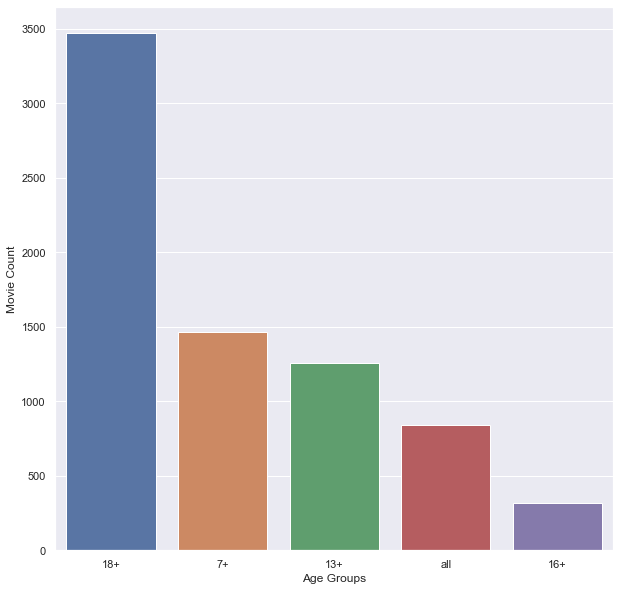

In [22]:
plt.figure(figsize=(10,10))
plt.xlabel('Age Groups')
sns.barplot(x=age.index,y=age)
plt.ylabel('Movie Count')

### By To 10 Language

In [23]:
language = df['Language'].value_counts().head(10)
language

English            10955
Hindi                503
English,Spanish      276
Spanish              267
English,French       174
Italian              166
French               163
Japanese             155
Mandarin             151
Tamil                 93
Name: Language, dtype: int64

Text(45.875, 0.5, 'Movie Count')

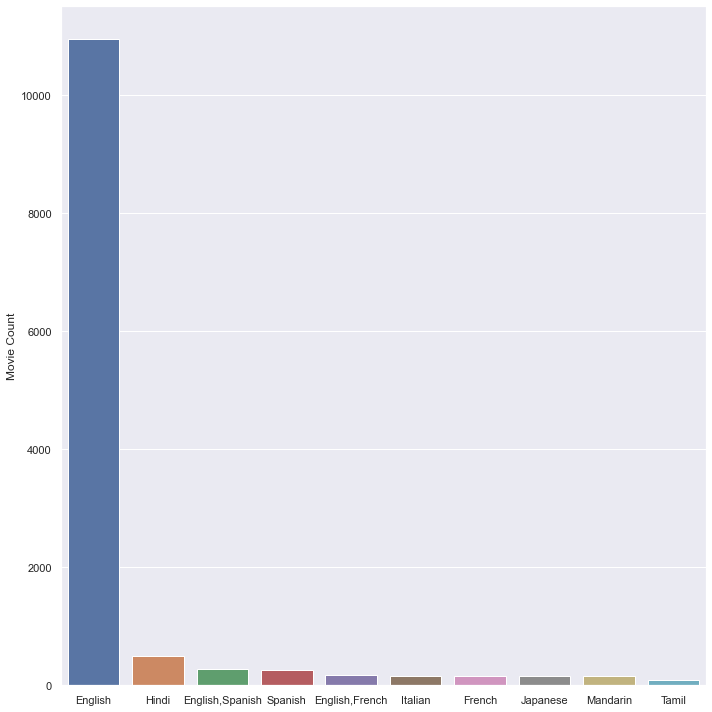

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x=language.index,y=language)
plt.tight_layout()
plt.ylabel('Movie Count')

# EDA by AGE

In [25]:
list1 = ['Netflix','Hulu','Prime Video','Disney+']

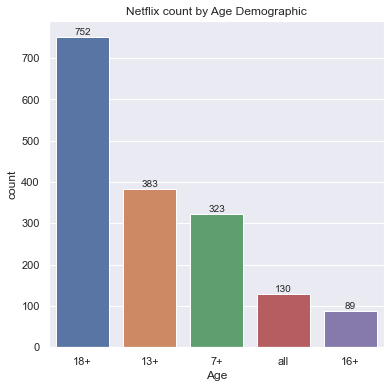

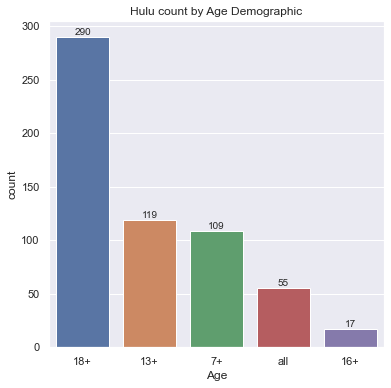

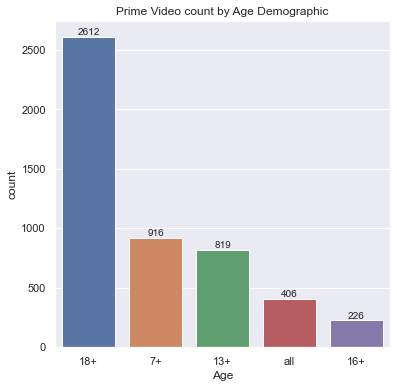

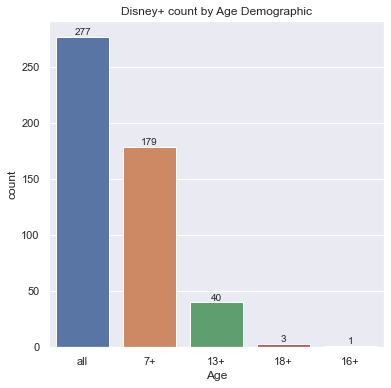

In [26]:
for i in list1:
    count = df[i][df[i]==1].groupby(df['Age']).value_counts()
    count = count.droplevel(1)
    count.sort_values(ascending=False, inplace=True)
    plt.figure(figsize=(6,6))
    plt.title(i+' count by Age Demographic')
    ax = sns.barplot(x=count.index,y=count)
    ax.bar_label(ax.containers[0])
    plt.ylabel('count')

# EDA for Critics

## Rotten Tomato analysis

In [27]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeNum', 'Rotten_Tomatoes'],
      dtype='object')

<AxesSubplot:xlabel='Rotten_Tomatoes', ylabel='Count'>

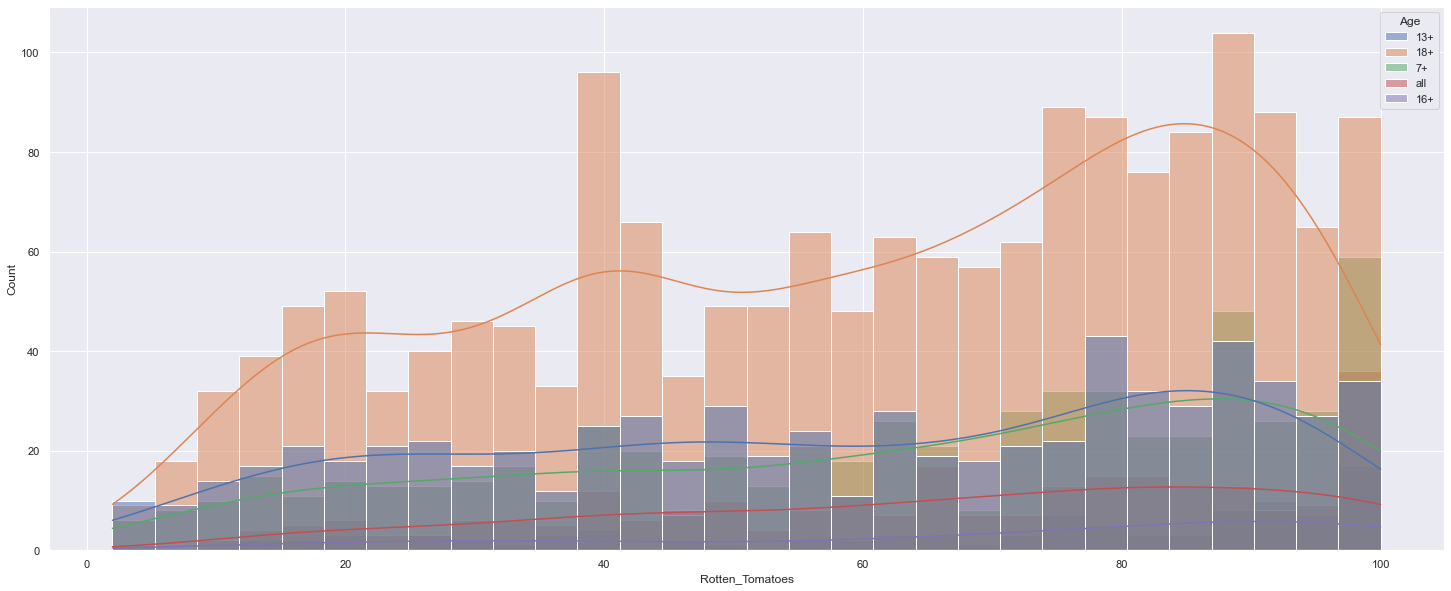

In [28]:
plt.figure(figsize=(25,10))
sns.histplot(x='Rotten_Tomatoes',data=df, bins=30,hue='Age', kde=True)

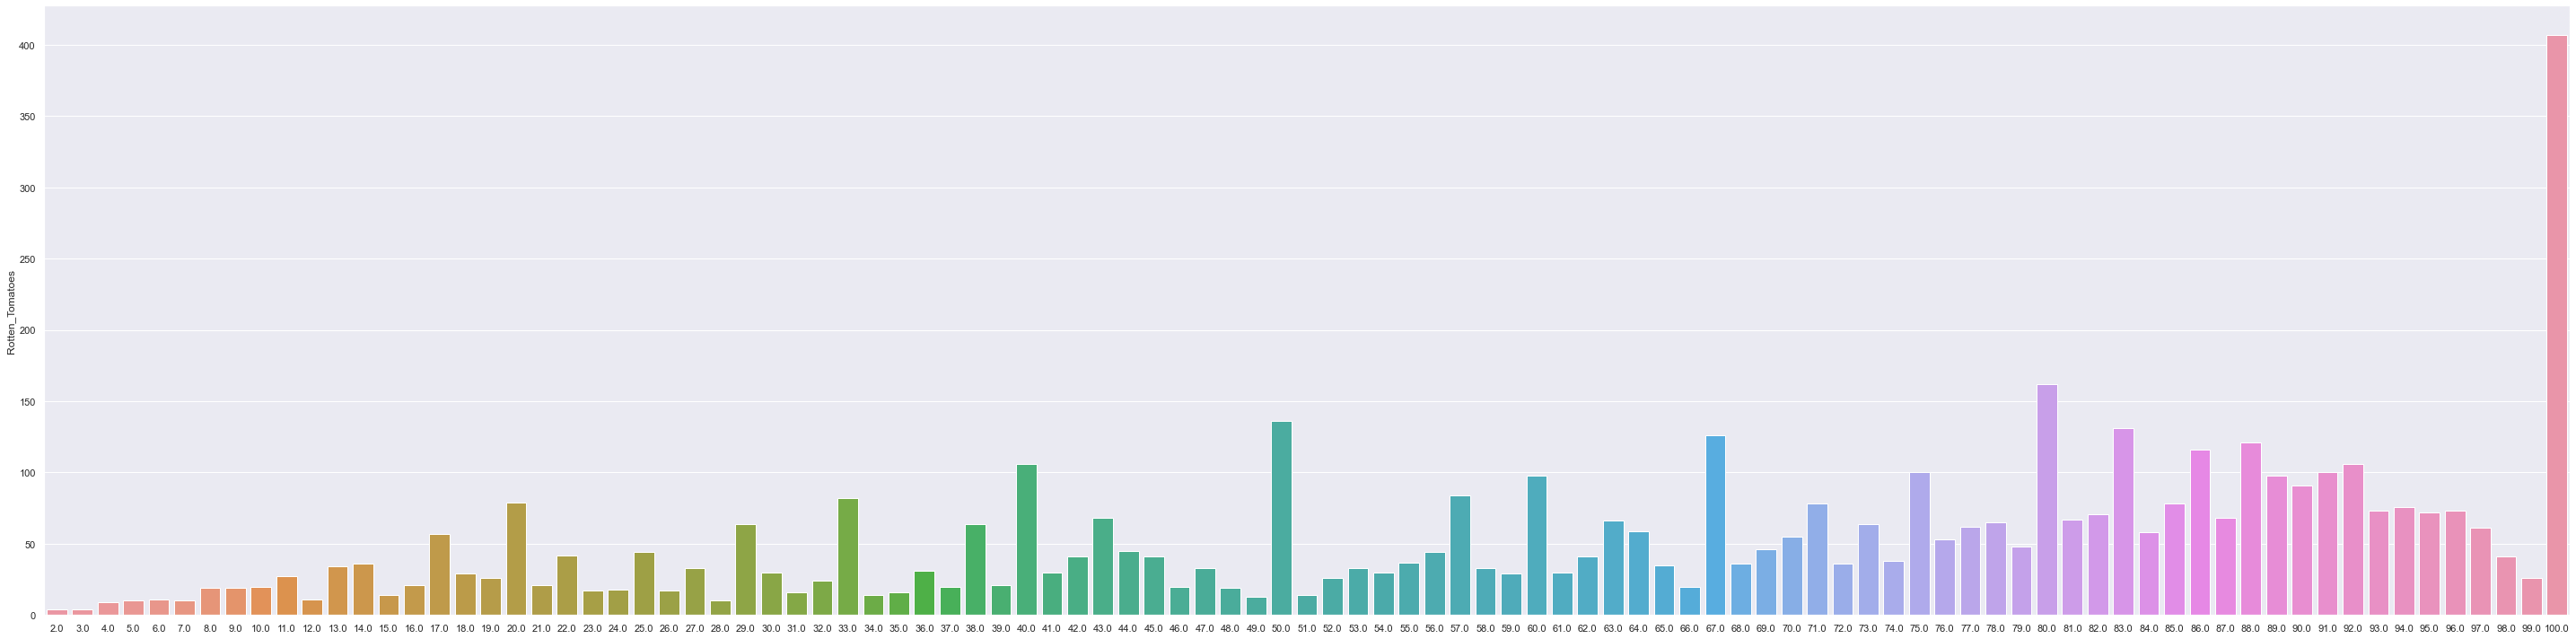

In [29]:
plt.figure(figsize=(40,10))
sns.barplot(x=df['Rotten_Tomatoes'].value_counts().index, y=df['Rotten_Tomatoes'].value_counts())
plt.tight_layout()

In [30]:
df.head()

Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0                       Inception  2010  13+   8.8             87%        1   
1                      The Matrix  1999  18+   8.7             87%        1   
2          Avengers: Infinity War  2018  13+   8.5             84%        1   
3              Back to the Future  1985   7+   8.5             96%        1   
4  The Good, the Bad and the Ugly  1966  18+   8.8             97%        1   

   Hulu  Prime Video  Disney+  Type                       Directors  \
0     0            0        0     0               Christopher Nolan   
1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2     0            0        0     0         Anthony Russo,Joe Russo   
3     0            0        0     0                 Robert Zemeckis   
4     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  AgeNum  Rotten_Tomatoes  
0  English,Japanese,French    148.0    13.0             87.0  
1                  English    136.0    18.0             87.0  
2                  English    149.0    13.0             84.0  
3                  English    116.0     7.0             96.0  
4                  Italian    161.0    18.0             97.0

In [31]:
list1 = ['Netflix','Hulu','Prime Video','Disney+']
lst1 = []
for i in list1:
    x = df[df[i]==1]['Rotten Tomatoes'].value_counts().sum()
    lst1.append(x)

In [32]:
high_rt = pd.Series(lst1, index=list1)
high_rt = high_rt.sort_values(ascending=False)
high_rt

Prime Video    3077
Netflix        1427
Hulu            637
Disney+         345
dtype: int64

[Text(0, 0, '3077'), Text(0, 0, '1427'), Text(0, 0, '637'), Text(0, 0, '345')]

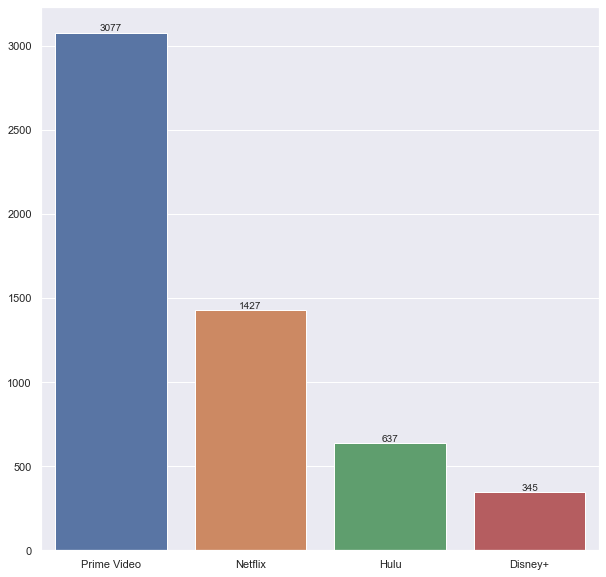

In [33]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=high_rt.index,y=high_rt)
ax.bar_label(ax.containers[0])

**Prime Video offers more movies that were revied by Rotten Tomatoes**

## IMDb analysis

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

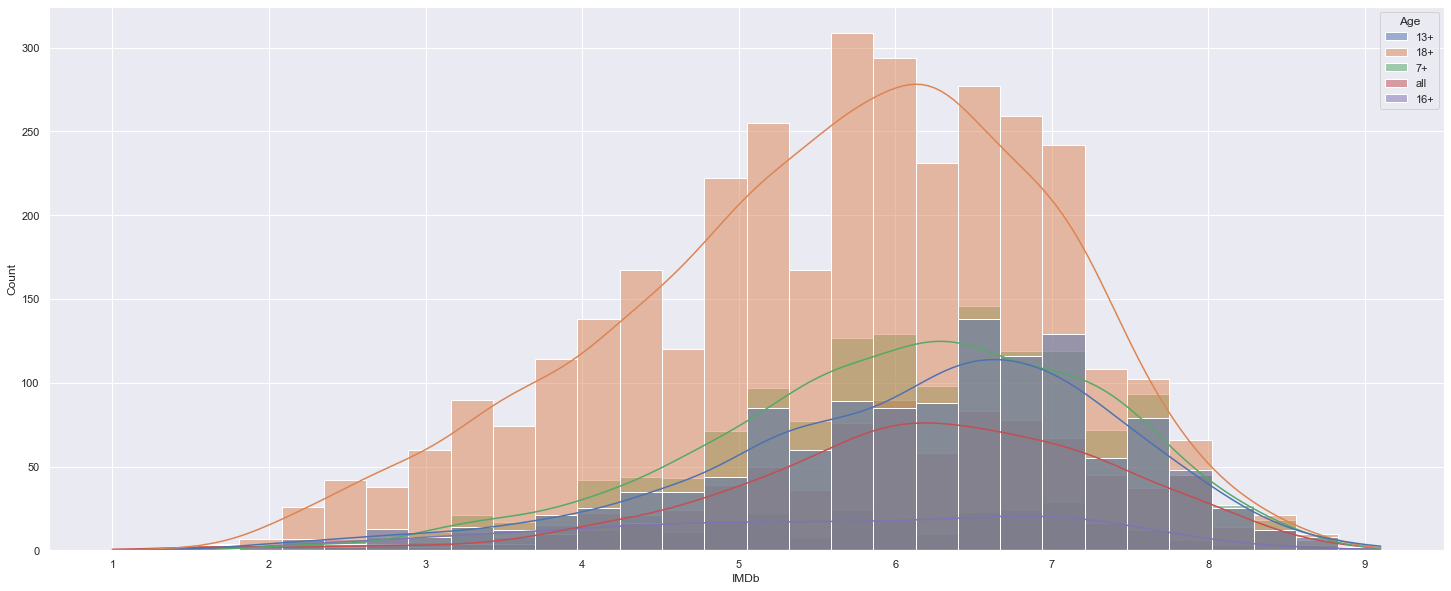

In [34]:
plt.figure(figsize=(25,10))
sns.histplot(x='IMDb',data=df, bins=30,hue='Age', kde=True)

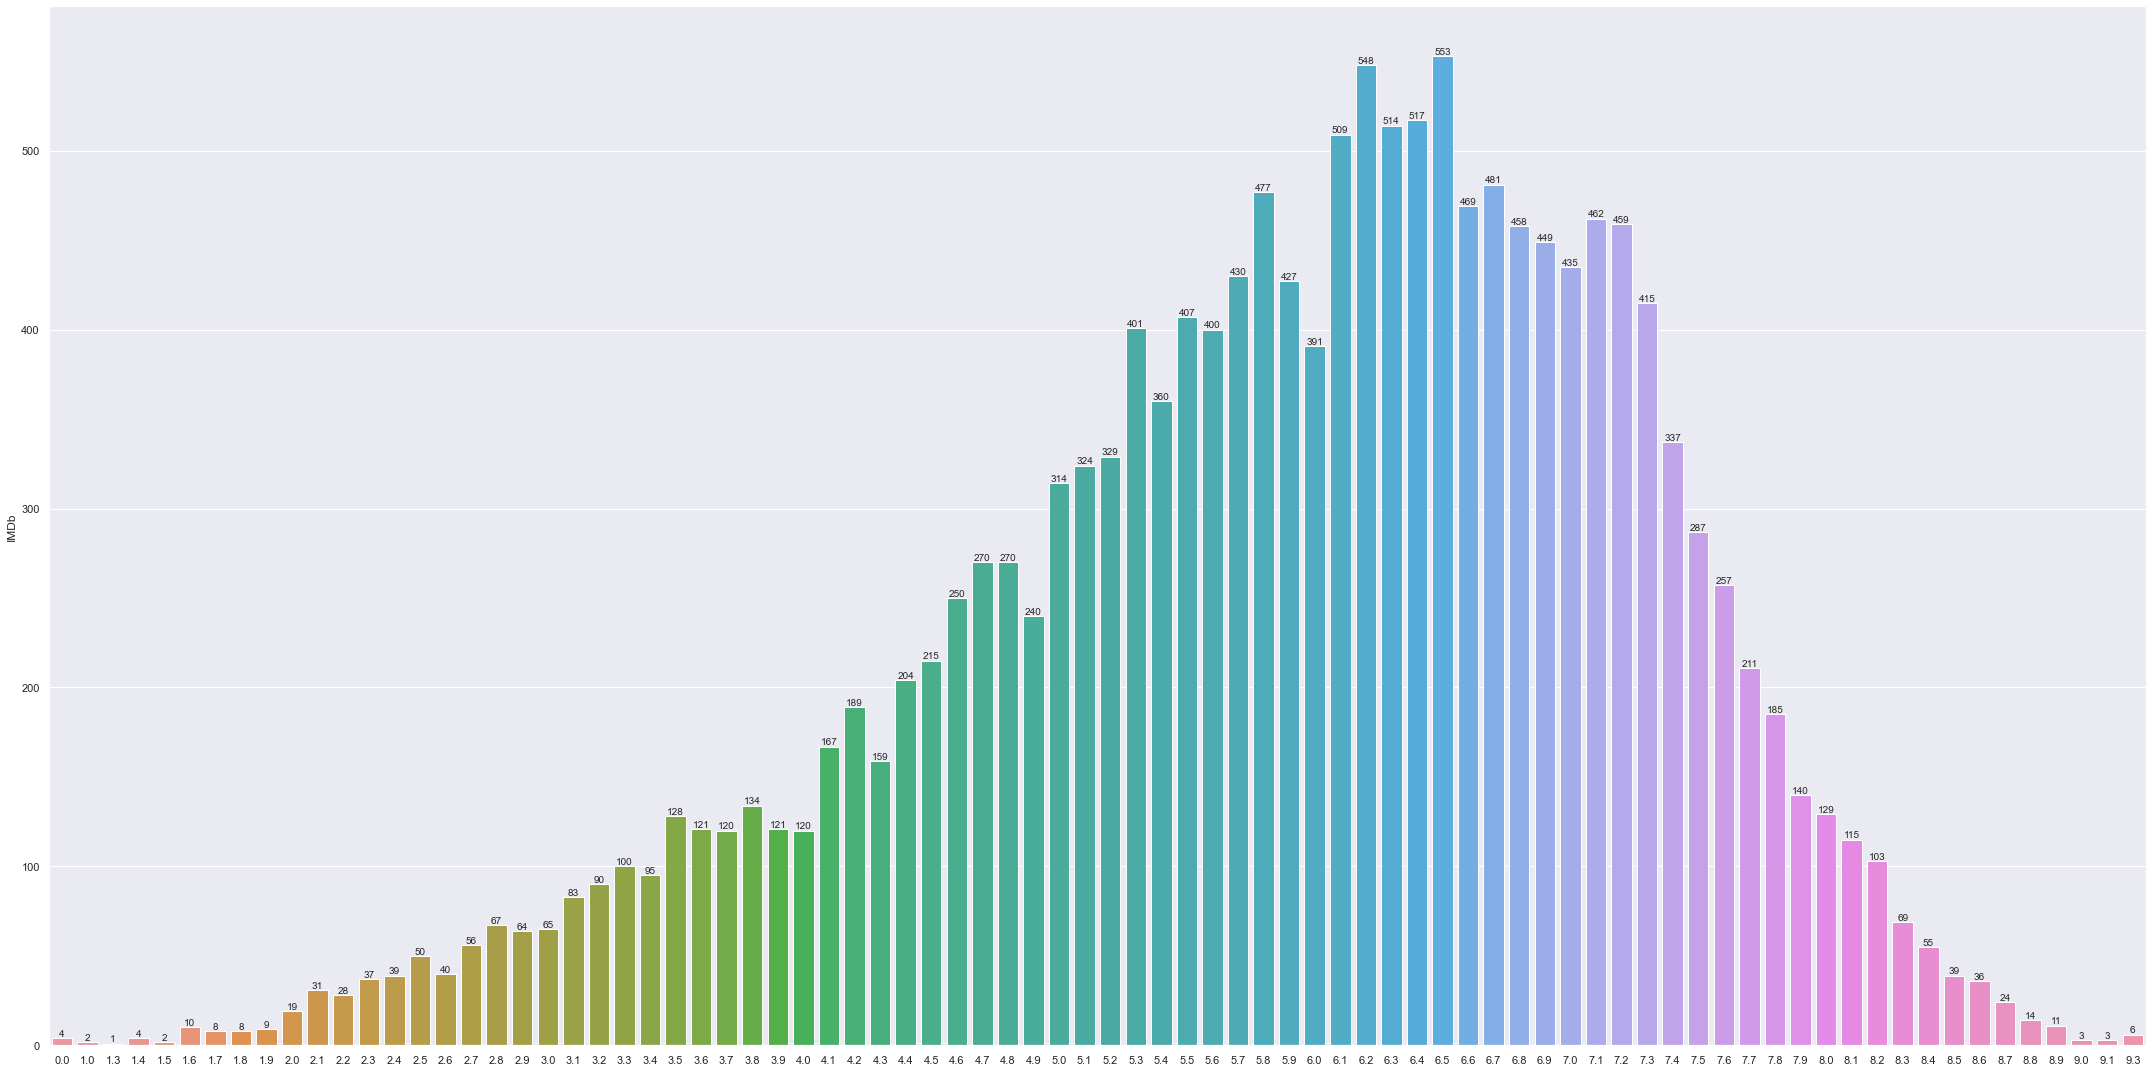

In [35]:
plt.figure(figsize=(30,15))
ax = sns.barplot(x=df['IMDb'].value_counts().index,y=df['IMDb'].value_counts())
ax.bar_label(ax.containers[0])
plt.tight_layout()

In [36]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeNum', 'Rotten_Tomatoes'],
      dtype='object')

In [37]:
list1 = ['Netflix','Hulu','Prime Video','Disney+']

In [38]:
lst1 = []
for i in list1:
    x = df[df[i]==1]['IMDb'].value_counts().sum()
    lst1.append(x)

In [40]:
imdb_score = pd.Series(lst1, index=list1)
imdb_score = imdb_score.sort_values(ascending=False)
imdb_score

Prime Video    11908
Netflix         3442
Hulu             892
Disney+          563
dtype: int64

[Text(0, 0, '11908'), Text(0, 0, '3442'), Text(0, 0, '892'), Text(0, 0, '563')]

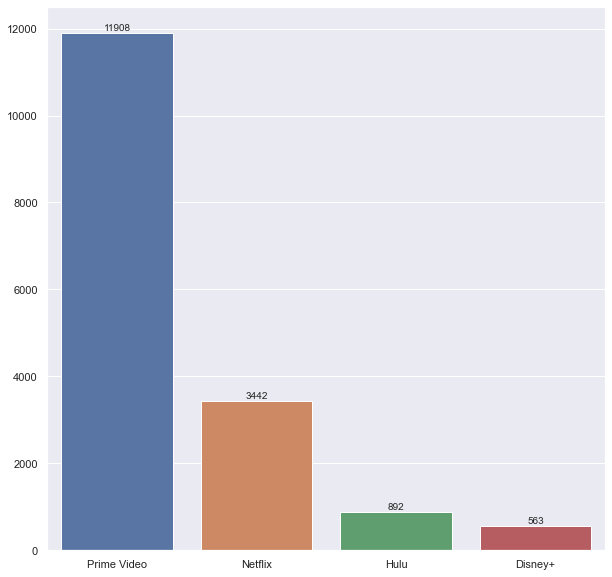

In [41]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=imdb_score.index,y=imdb_score)
ax.bar_label(ax.containers[0])

**Prime offers more movies reviewed by IMDb**

## Distribution of ratings based on service and scoring entity

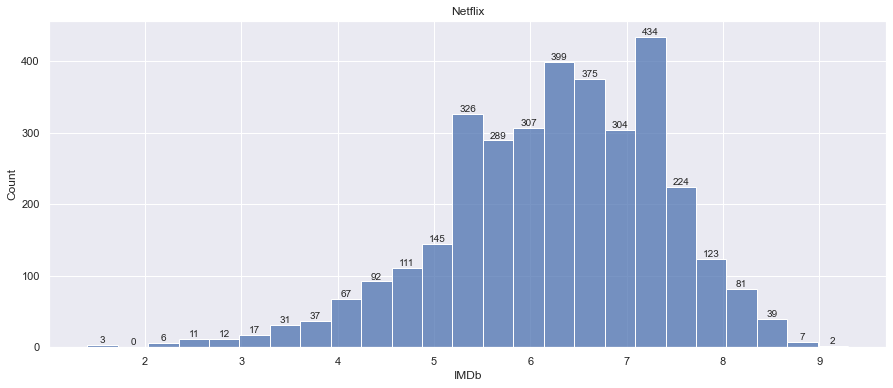

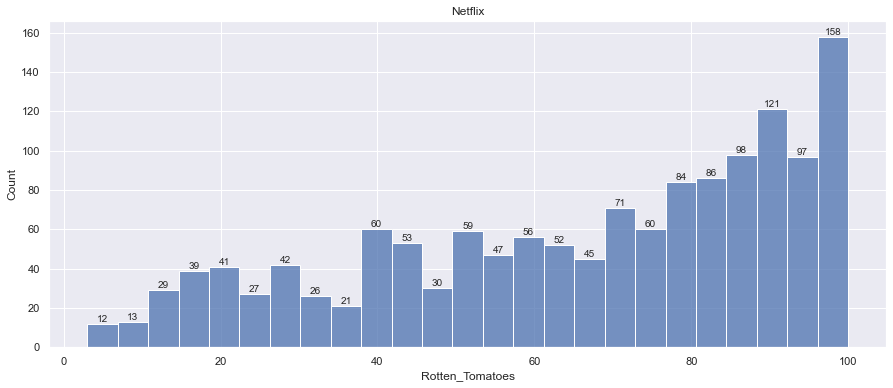

<Figure size 432x288 with 0 Axes>

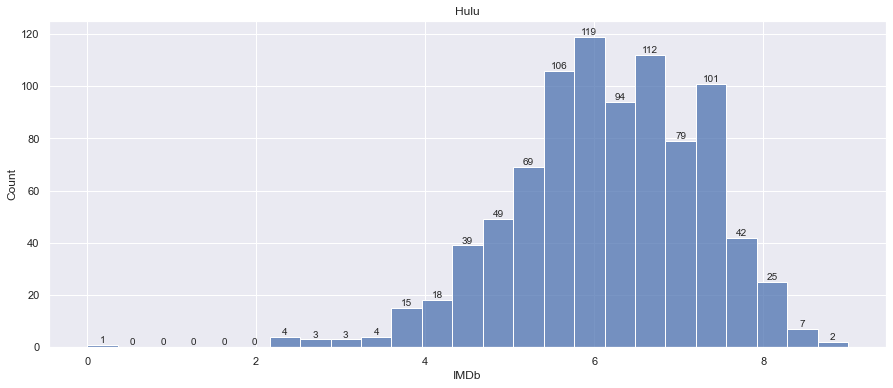

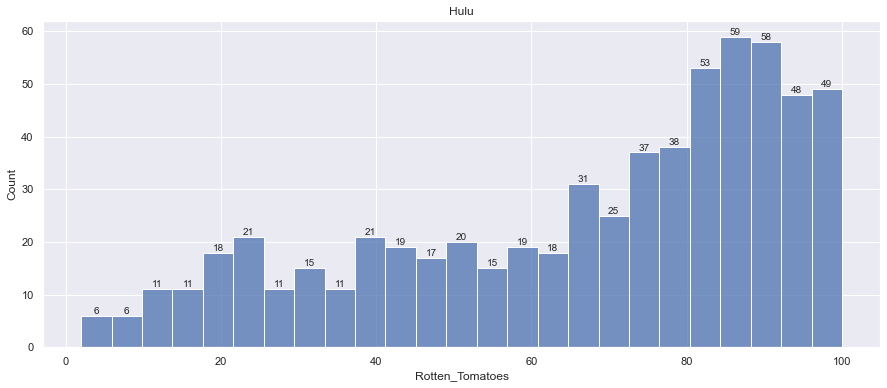

<Figure size 432x288 with 0 Axes>

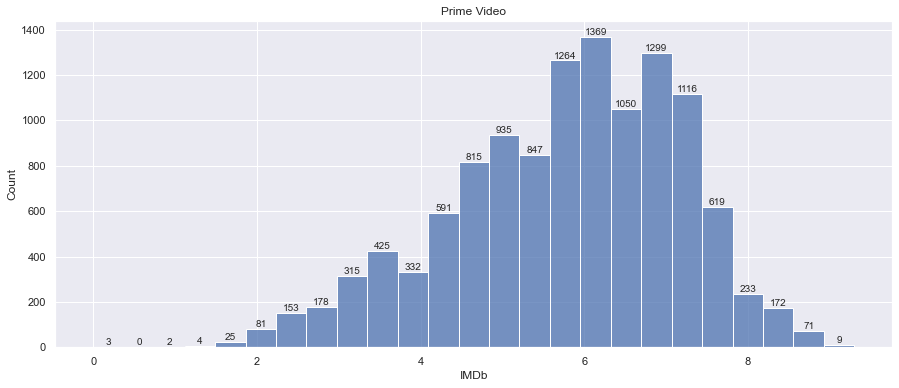

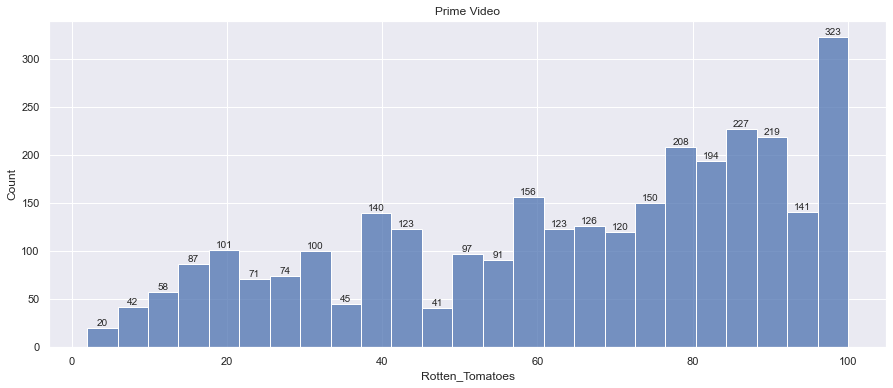

<Figure size 432x288 with 0 Axes>

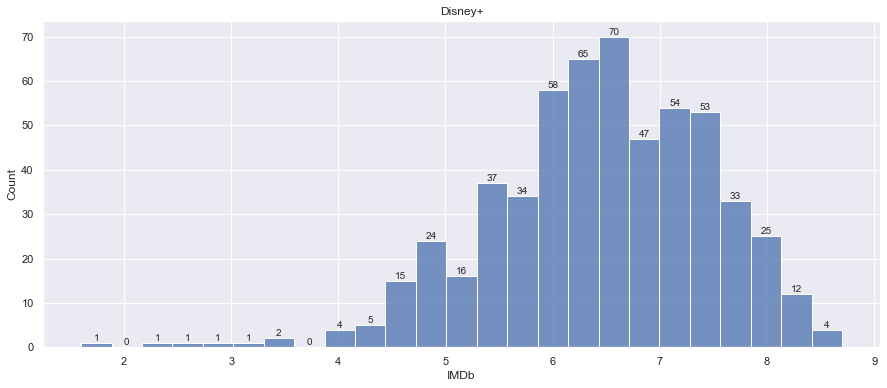

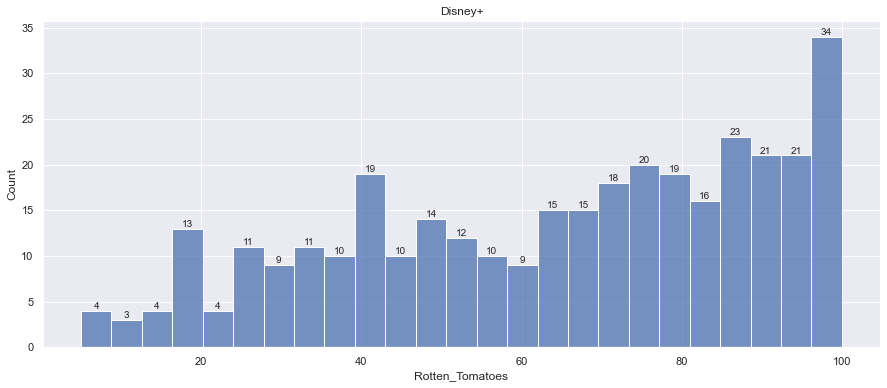

<Figure size 432x288 with 0 Axes>

In [42]:
list1 = ['Netflix','Hulu','Prime Video','Disney+']

for i in list1:
    plt.figure(figsize=(15,6))
    plt.title(i)
    ax = sns.histplot(x=df[df[i]==1]['IMDb'], bins=25)
    ax.bar_label(ax.containers[0])
    plt.show()
    print('')
    plt.figure(figsize=(15,6))
    plt.title(i)
    ax1 = sns.histplot(x=df[df[i]==1]['Rotten_Tomatoes'], bins=25)
    ax1.bar_label(ax1.containers[0])
    plt.show()
    plt.tight_layout()
    

# Distribution of runtime

<AxesSubplot:xlabel='Runtime', ylabel='Count'>

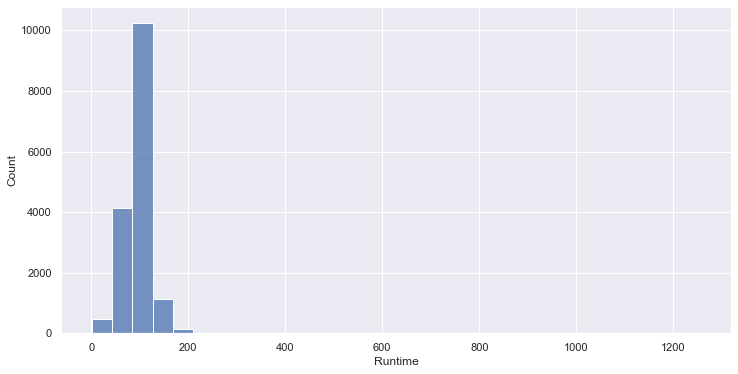

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Runtime', bins=30)

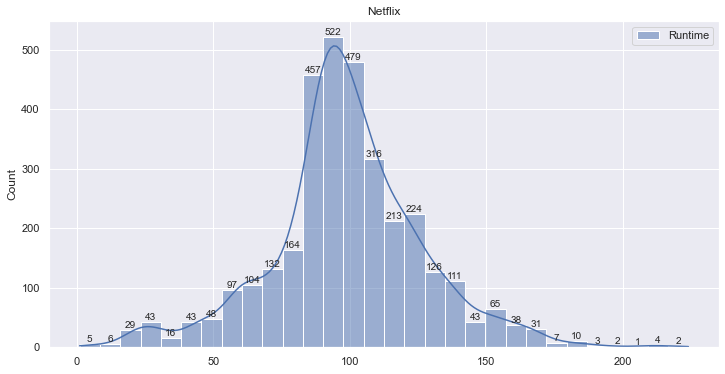

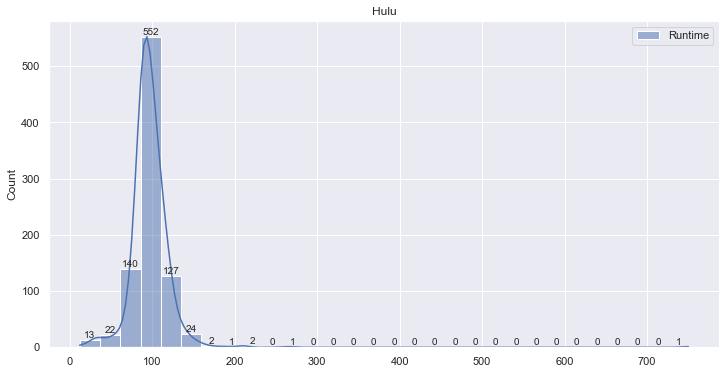

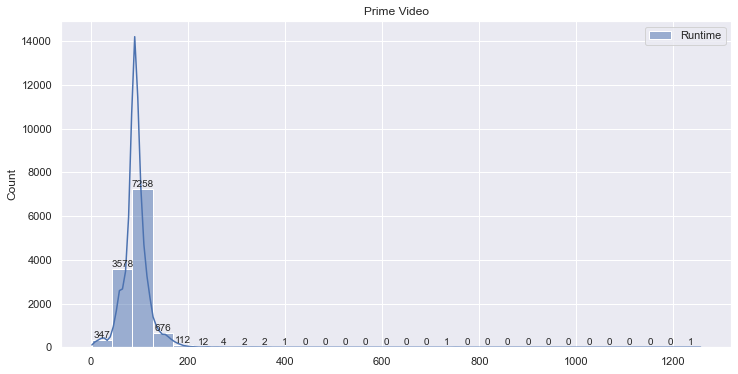

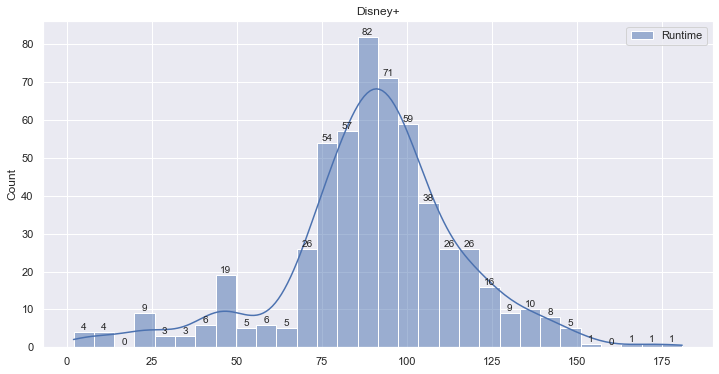

In [44]:
list1 = ['Netflix','Hulu','Prime Video','Disney+']

for i in list1:
    plt.figure(figsize=(12,6))
    ax = sns.histplot(df[df[i]==1][['Runtime']], bins=30, kde=True)
    ax.bar_label(ax.containers[0])
    plt.title(i)



# Director analysis

**Some directors are saved as NaN and need to be converted to a string value so we can make loop and split instances where multiple directors were listed for one movie**

In [45]:
df['Directors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16744 entries, 0 to 16743
Series name: Directors
Non-Null Count  Dtype 
--------------  ----- 
16018 non-null  object
dtypes: object(1)
memory usage: 130.9+ KB


#### Cleaning

**Director column has some NaN values and we need it to be string values**

In [46]:
df['Directors'] = df['Directors'].astype(str)

In [47]:
df['Directors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16744 entries, 0 to 16743
Series name: Directors
Non-Null Count  Dtype 
--------------  ----- 
16744 non-null  object
dtypes: object(1)
memory usage: 130.9+ KB


In [48]:
df_dir = df['Directors']

**Splitting director names into their own list since some movies have more than one director listed**

In [49]:
dirlist = list(df_dir)

In [50]:
list3 = []

for i in dirlist:
    x = i.split(',')
    list3.append(x)


**List3 became a 2D list and it needs to be flatten with list comprehension to be a 1D list**

In [51]:
# newlist = y
# for i in list3
# for y in i
newlist = [y for i in list3 for y in i]

**Creating a set to store non-duplicate values to compare how many unique directors there are**

In [52]:
listset = set()
for i in newlist:
    listset.add(i)

In [53]:
len(listset)

12454

**There are dulicates (when comparing the below list length to the list above length) and we want to count them to see how many times a director has had a movie featured on the streaming services**

In [54]:
len(newlist)

18924

**Creating a dictionary that loops the directors names and as it itierates it creates a key that is the directors name and assigns the count value to that key**

In [55]:
d = {}
for i in newlist:
    d[i] = newlist.count(i)

**Comparing the dictionary list length to the listset to ensure the dictionary only contains unique values**

In [56]:
len(d)

12454

**Turning the dictionary into a dataframe**

In [57]:
dir_count_df = pd.DataFrame(d.values(), index=d.keys(), columns=['Count'])
dir_count_df.reset_index(inplace=True)
dir_count_df.columns = ['dir','count']
dir_count_df

dir  count
0         Christopher Nolan      4
1            Lana Wachowski      5
2           Lilly Wachowski      5
3             Anthony Russo      5
4                 Joe Russo      6
...                     ...    ...
12449      Edward M. Abroms      1
12450         Molly Hermann      1
12451      Bernard McEveety      1
12452        Dereck Joubert      1
12453  Richard Slater-Jones      1

[12454 rows x 2 columns]

In [58]:
dir_count_df = dir_count_df.sort_values(ascending=False, by='count')
dir_count_df

dir  count
56                      nan    726
977             Jay Chapman     36
8166            Joseph Kane     31
1103             Cheh Chang     29
6950       William Beaudine     23
...                     ...    ...
5184              Laura Nix      1
5185            Alan Polsky      1
5186        Joe Manganiello      1
5189         Pierre De Moro      1
12453  Richard Slater-Jones      1

[12454 rows x 2 columns]

**Removing nan from the column since it only means some movies did not have the director listed**

In [59]:
top_20_dir = dir_count_df.head(20)
top_20_dir.drop(56, inplace=True)
top_20_dir.head(1)

C:\Users\JB\AppData\Local\Temp\ipykernel_23668\4187791291.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dir  count
977  Jay Chapman     36

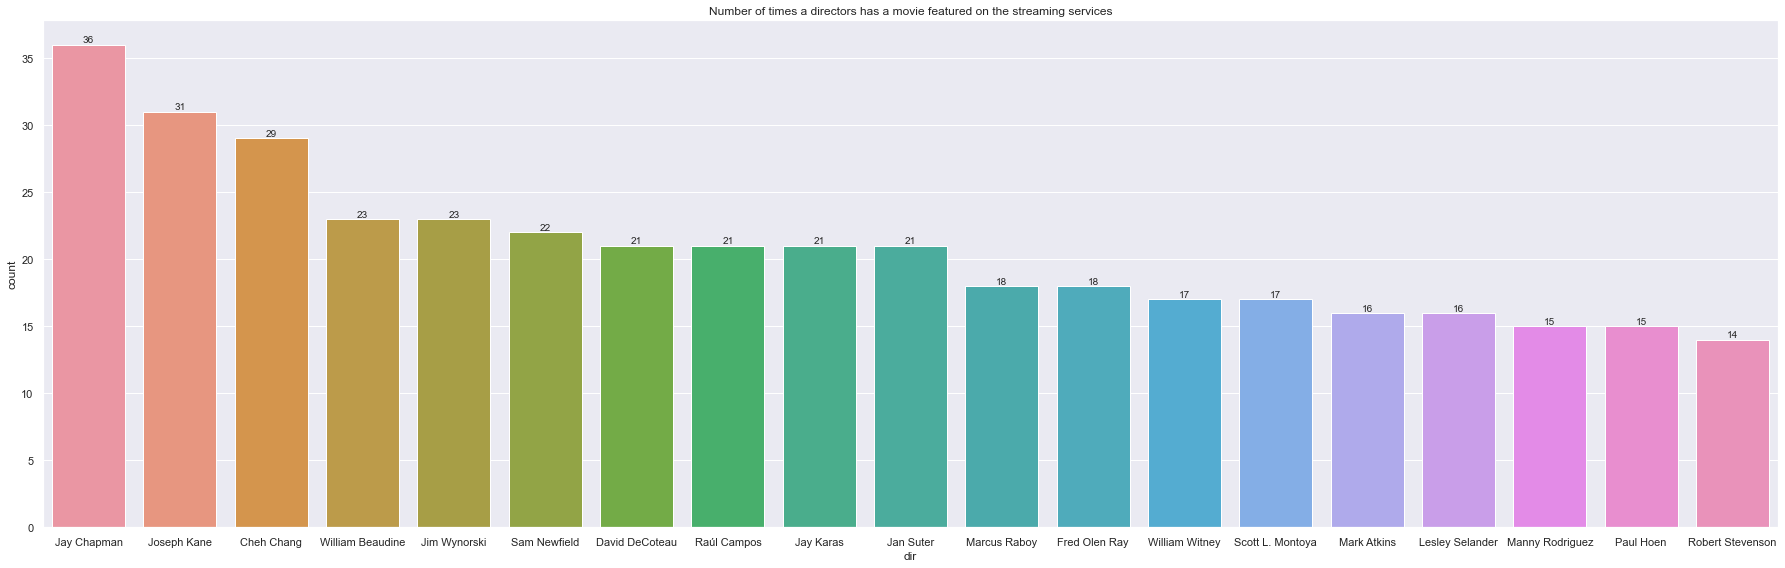

In [60]:
plt.figure(figsize=(25,8))
ax = sns.barplot(x='dir',y='count',data=top_20_dir)
ax.bar_label(ax.containers[0])
plt.title('Number of times a directors has a movie featured on the streaming services')
plt.tight_layout()

**Jay Chapman was a top counted director**

In [61]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeNum', 'Rotten_Tomatoes'],
      dtype='object')

In [62]:
df[(df['Directors'].str.contains('Jay Chapman')) | (df['Directors'].str.contains('Joseph Kane'))][['Directors','Title','Genres','IMDb','Rotten_Tomatoes','Country','Language','Age']]

Directors                          Title  \
1014   Jay Chapman         Jim Gaffigan: Obsessed   
1234   Jay Chapman    Iliza Shlesinger: War Paint   
1417   Jay Chapman  Tom Segura: Completely Normal   
2211   Jay Chapman        Todd Barry: Spicy Honey   
2331   Jay Chapman   Craig Ferguson: Tickle Fight   
...            ...                            ...   
14555  Joseph Kane                The Arizona Kid   
14575  Joseph Kane           Sheriff of Tombstone   
14649  Joseph Kane        Robin Hood of the Pecos   
15097  Joseph Kane            The Carson City Kid   
15532  Joseph Kane            Days of Jesse James   

                             Genres  IMDb  Rotten_Tomatoes        Country  \
1014             Documentary,Comedy   7.6            100.0  United States   
1234                         Comedy   6.7              NaN  United States   
1417             Documentary,Comedy   7.8              NaN  United States   
2211                         Comedy   6.7              NaN  United States   
2331                         Comedy   6.6              NaN  United States   
...                             ...   ...              ...            ...   
14555             Music,War,Western   6.4              NaN  United States   
14575  Comedy,Music,Romance,Western   6.1              NaN  United States   
14649          Comedy,Music,Western   6.1              NaN  United States   
15097          Comedy,Music,Western   6.2              NaN  United States   
15532               Romance,Western   5.9              NaN  United States   

      Language  Age  
1014   English  16+  
1234   English  NaN  
1417   English  NaN  
2211   English  NaN  
2331   English  NaN  
...        ...  ...  
14555  English  NaN  
14575  English  NaN  
14649  English  NaN  
15097  English  all  
15532  English  all  

[67 rows x 8 columns]

# Exploring Genres

**Some genres contain multiple entries per movie**

**Ensuring string data type**

In [63]:
df['Genres'] = df['Genres'].astype(str)

In [64]:
genre_list = list(df['Genres'])

**Splitting the list**

In [65]:
split_list = []
for i in genre_list:
    x = i.split(',')
    split_list.append(x)

**Flattening the multi-dimensional list**

In [66]:
import itertools
flat_genre = list(itertools.chain.from_iterable(split_list))

In [67]:
# List comprehension is an option
# flat_genre = [z for i in split_list for z in i]

**Creating a dictionary for easy conversion to a dataframe**

In [68]:
genre_d = {'Genre':flat_genre}

**Creating a dataframe**

In [69]:
genre_df = pd.DataFrame.from_dict(genre_d, orient='Columns')

In [70]:
genre_df.head()

Genre
0     Action
1  Adventure
2     Sci-Fi
3   Thriller
4     Action

## EDA

In [71]:
genre_counts = pd.DataFrame(genre_df.value_counts())
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['genre','count']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

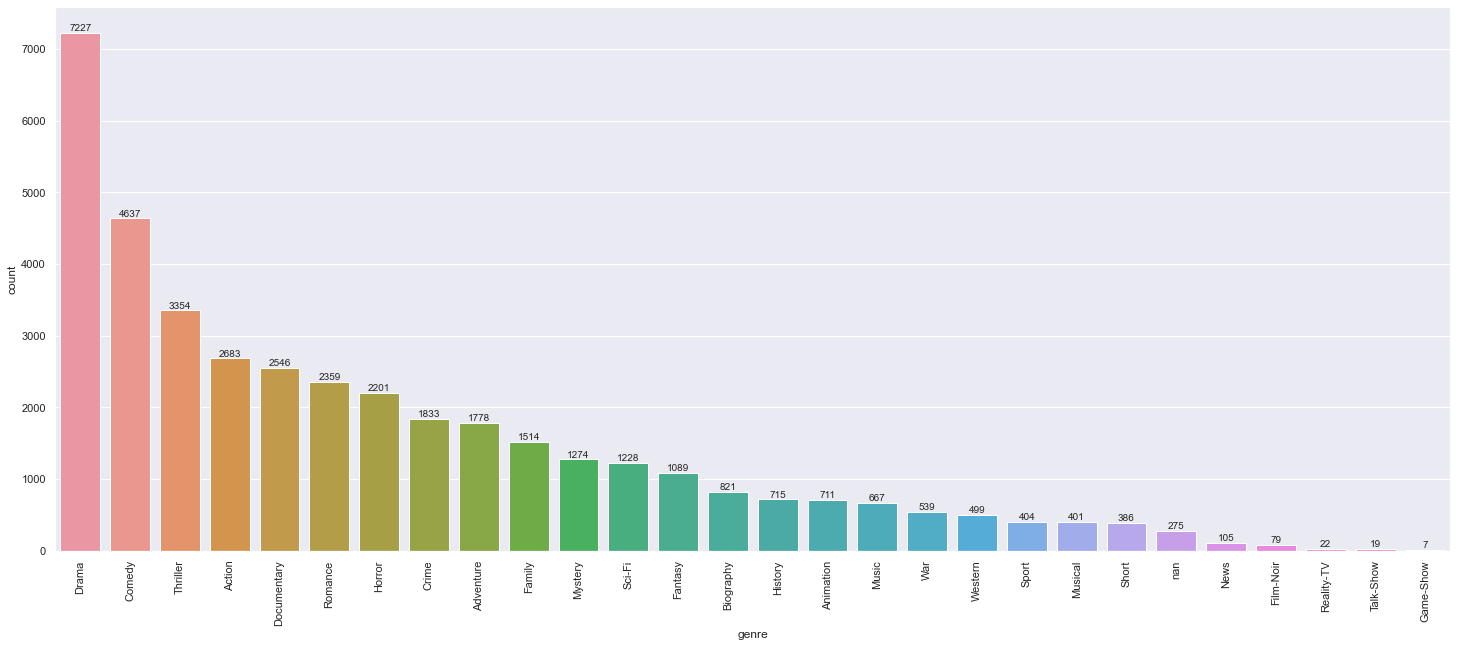

In [72]:
plt.figure(figsize=(25,10))
plt.xticks(rotation='vertical')
ax = sns.barplot(data=genre_counts, x='genre', y='count')
ax.bar_label(ax.containers[0])
plt.tight_layout

# Top Movies

In [73]:
list1 = ['Netflix','Hulu','Prime Video','Disney+']

In [74]:
df[df['Netflix']==1].sort_values(by='IMDb', ascending=False)[['Title','IMDb']].head(10)

Title  IMDb
1292  My Next Guest with David Letterman and Shah Ru...   9.3
947                                           Natsamrat   9.1
4                        The Good, the Bad and the Ugly   8.8
0                                             Inception   8.8
1214                             Bill Hicks: Relentless   8.7
1311                             Eh Janam Tumhare Lekhe   8.7
1                                            The Matrix   8.7
1979            One Heart: The A.R. Rahman Concert Film   8.7
1458                                    Untamed Romania   8.7
1356                              Merku Thodarchi Malai   8.6

## IMDb Top Movies

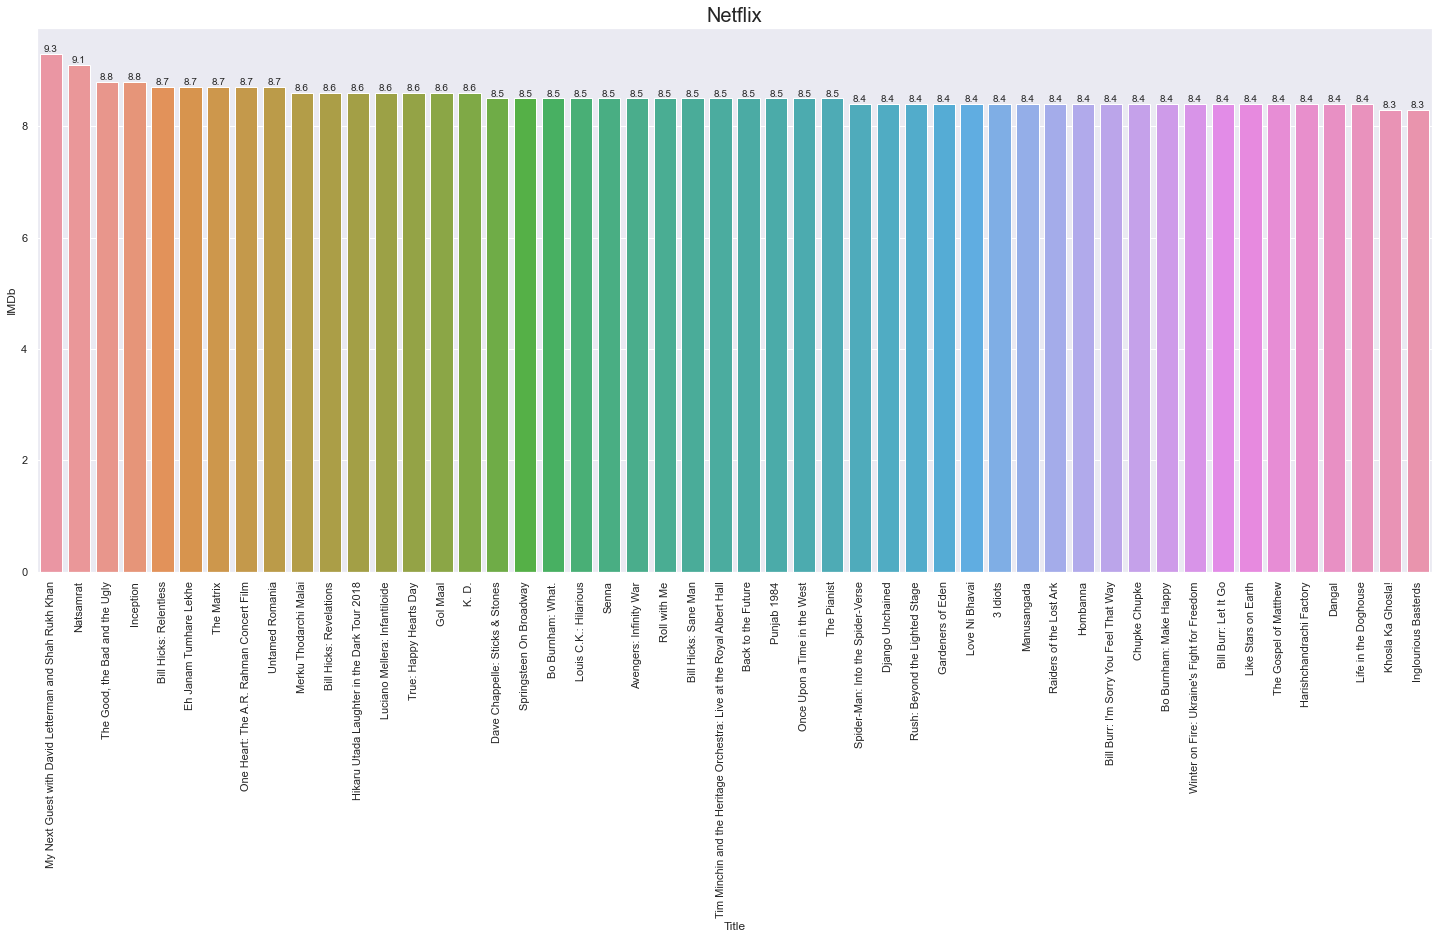

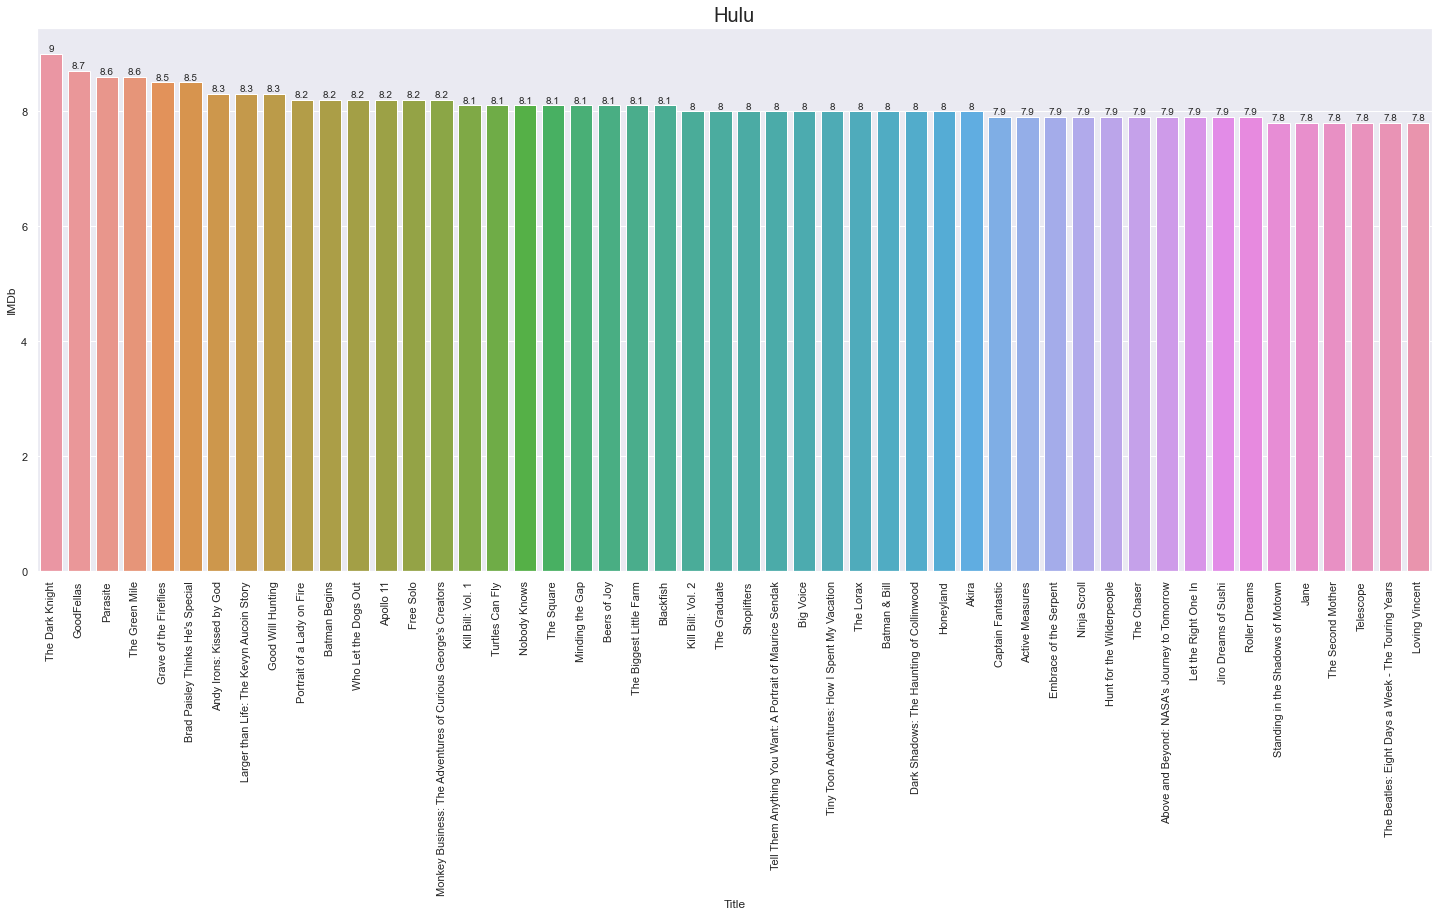

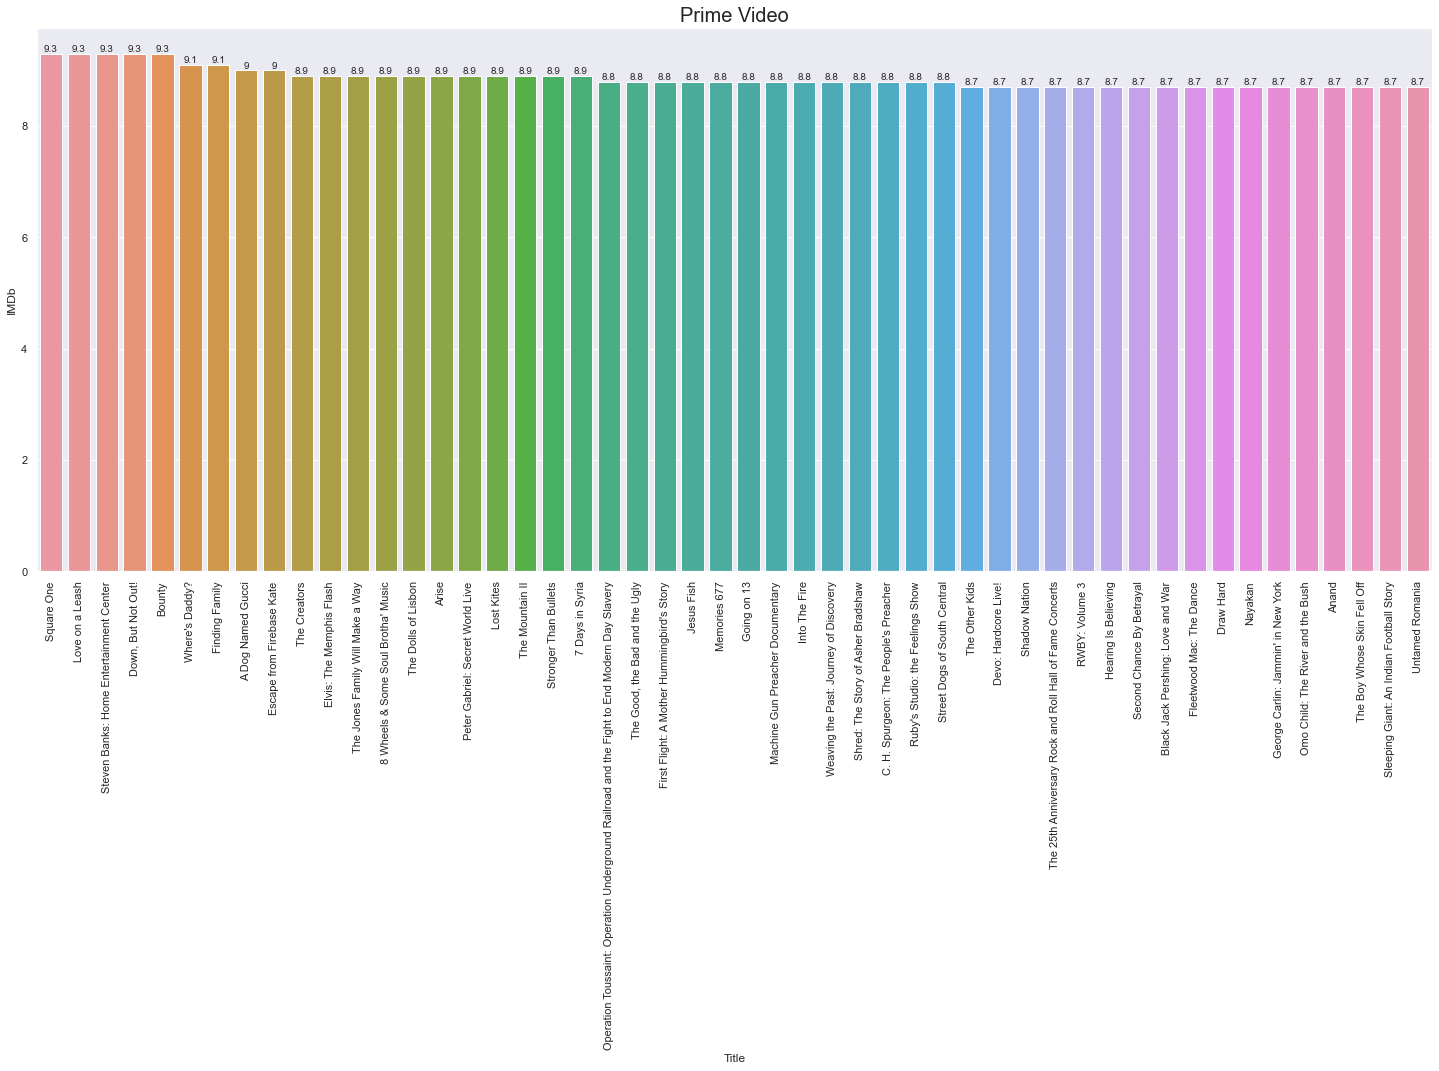

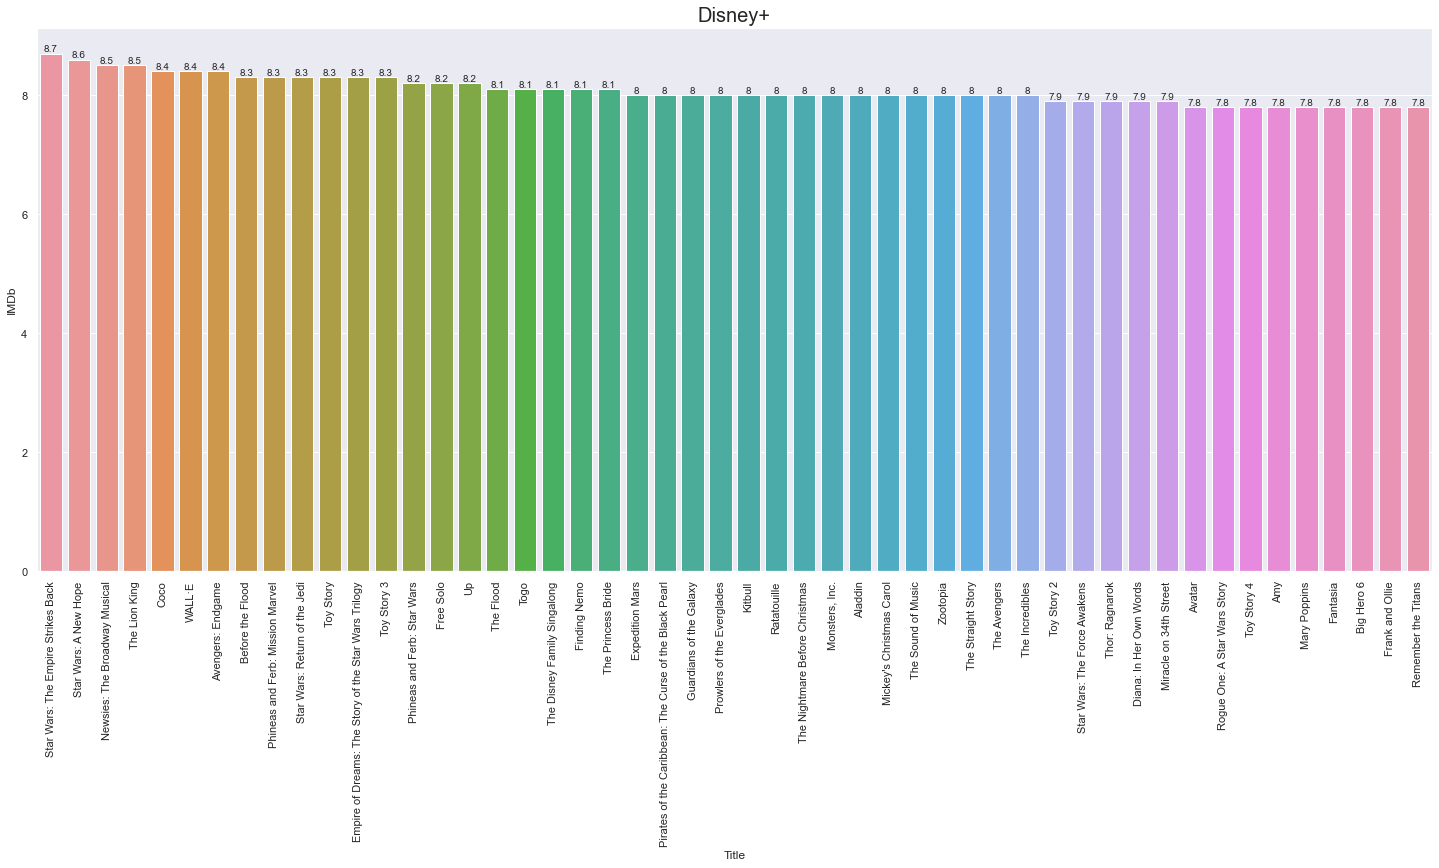

In [75]:
for i in list1:
    g = df[df[i]==1].sort_values(by='IMDb', ascending=False)[['Title','IMDb']].head(50)
    plt.figure(figsize=(25,10))
    plt.title(i, fontsize=20)
    plt.xticks(rotation='vertical')
    ax = sns.barplot(data=g, x='Title', y='IMDb')
    ax.bar_label(ax.containers[0])
    plt.tight_layout

## Rotten Tomatoes

In [76]:
df[df[i]==1].sort_values(by='Rotten_Tomatoes', ascending=False)[['Title','Rotten_Tomatoes']].head(10)

Title  Rotten_Tomatoes
16341  Tinker Bell and the Lost Treasure            100.0
16289           Mickey's Christmas Carol            100.0
16233                        Toy Story 2            100.0
16318                        Tinker Bell            100.0
16215                          Toy Story            100.0
16327                         Old Yeller            100.0
16273                          Pinocchio            100.0
5398                The Three Musketeers            100.0
5164                          Robin Hood            100.0
16360          The Journey of Natty Gann            100.0

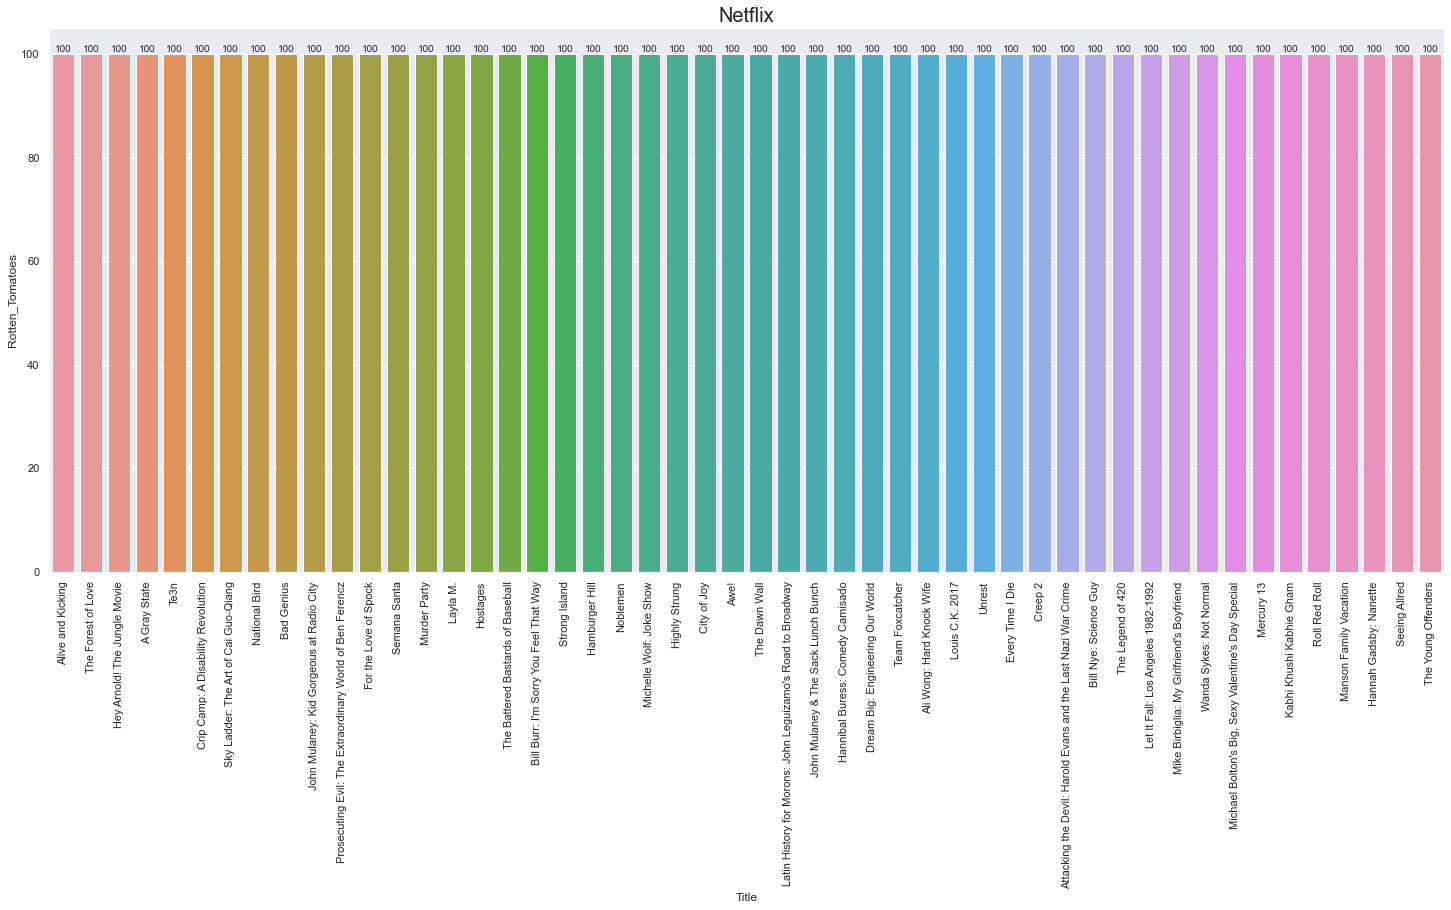

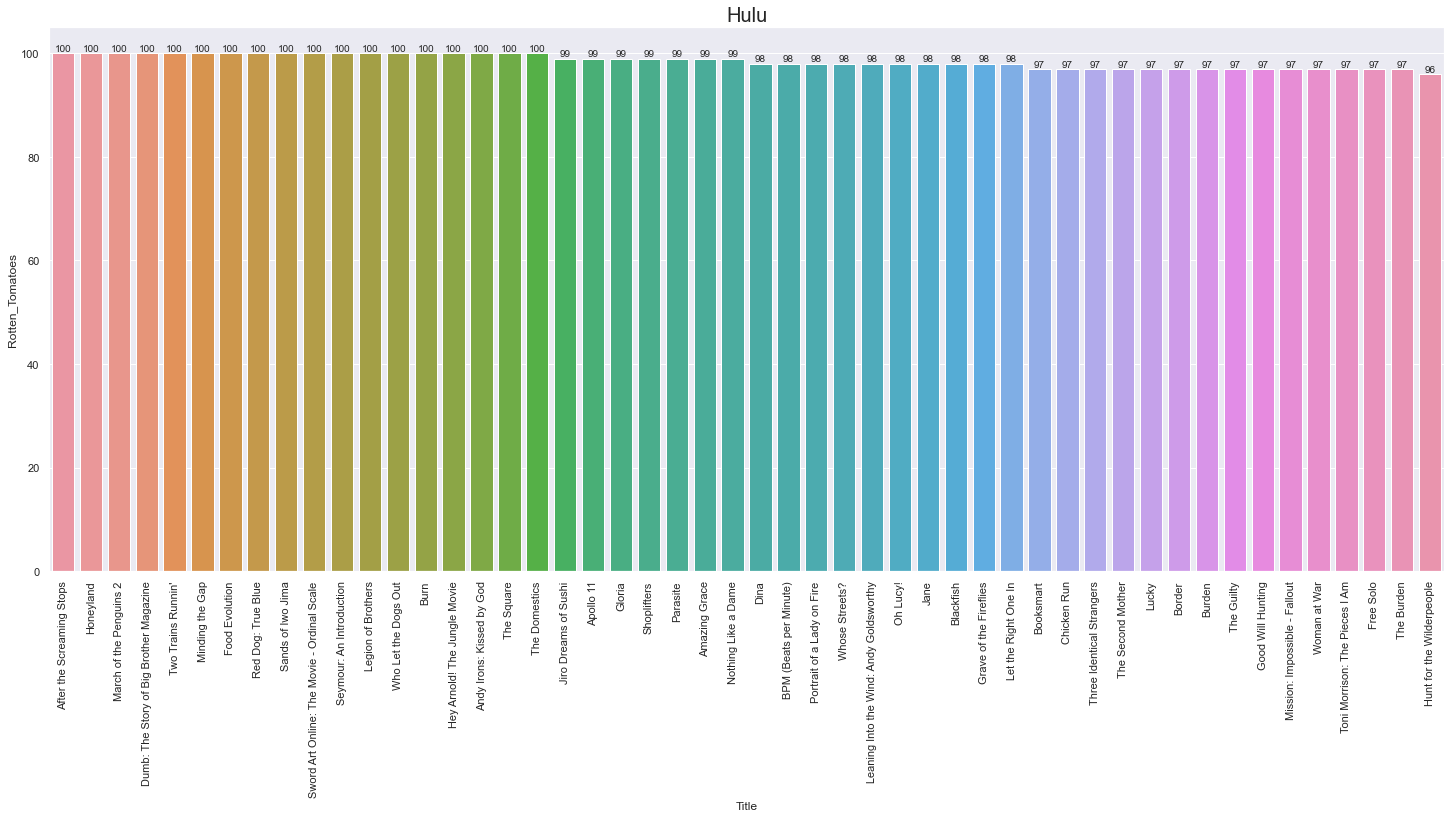

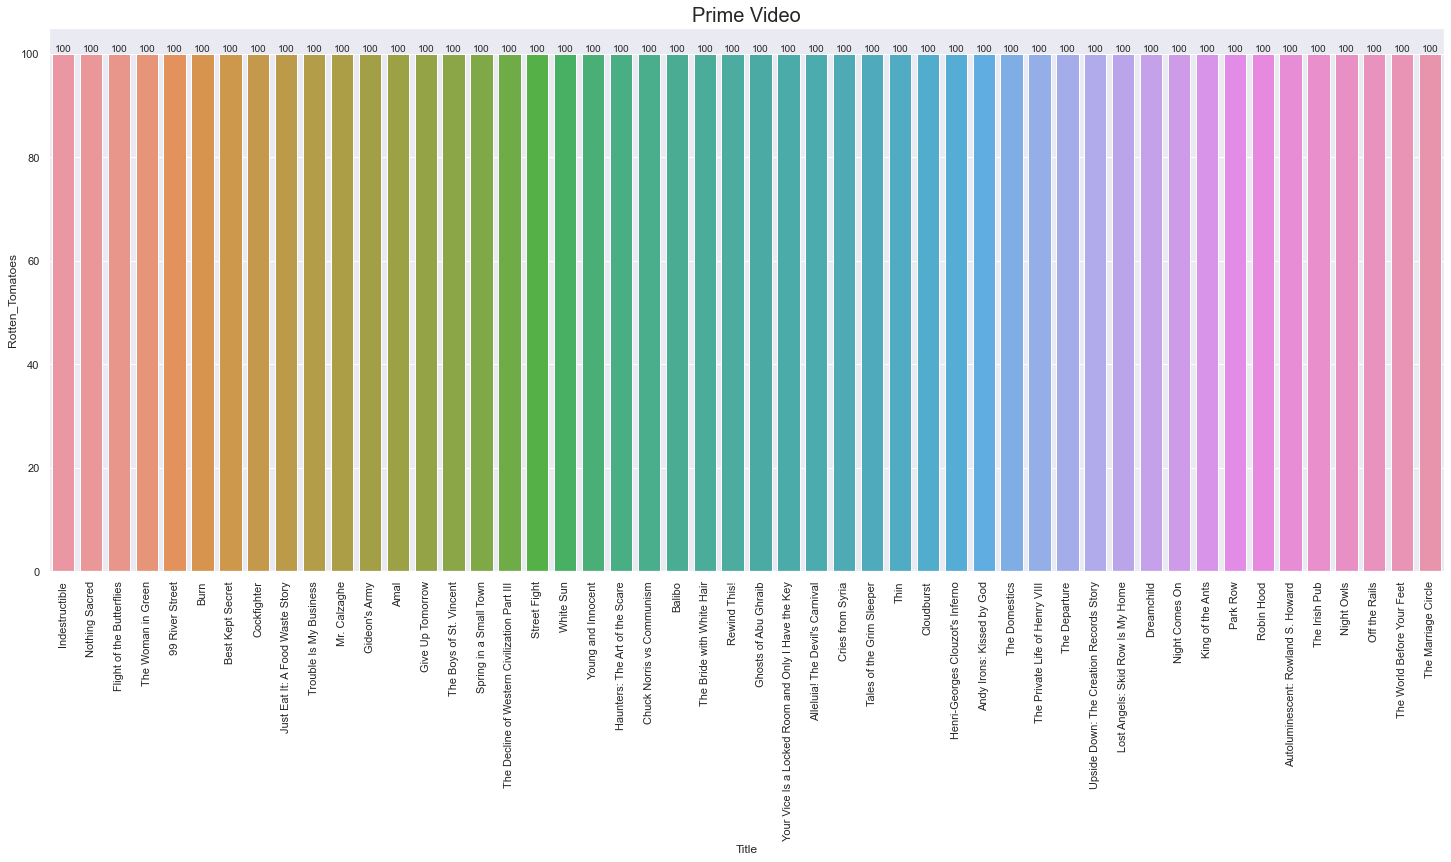

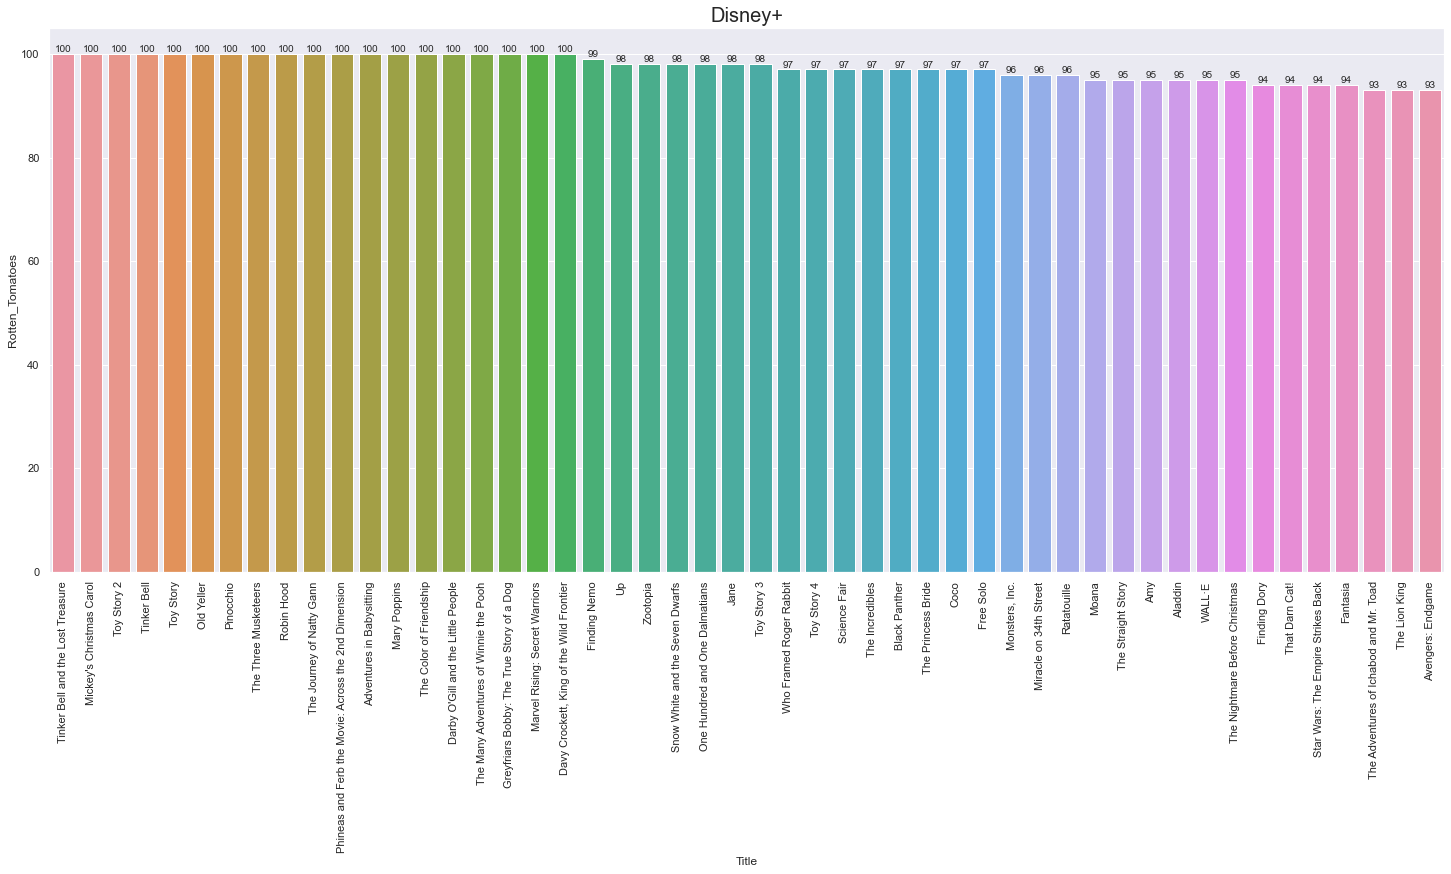

In [77]:
for i in list1:
    g = df[df[i]==1].sort_values(by='Rotten_Tomatoes', ascending=False)[['Title','Rotten_Tomatoes']].head(50)
    plt.figure(figsize=(25,10))
    plt.title(i, fontsize=20)
    plt.xticks(rotation='vertical')
    ax = sns.barplot(data=g, x='Title', y='Rotten_Tomatoes')
    ax.bar_label(ax.containers[0])
    plt.tight_layout